In [1]:
%load_ext autoreload
%autoreload 2

# Structured Based Pharmacophores

Pharmacophore models can also be derived from a protein-ligand complex. In this notebook we will obtain structured based pharmacophores for four different protein-ligand complexes.

Structured based pharmacophores are obtained from Protein Data Bank structure files (pdb files). A file can be downloaded manually from the PDB webiste, or alternatively, a PDB id can be used.

In [2]:
from openpharmacophore.structured_based import StructuredBasedPharmacophore
from IPython.display import Image
import os

2021-10-26 14:54:53,211 [WARNING] [__init__.py:5] root: Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.


In [4]:
pdbs_path = '../../data/pdbs/'
pdbs = ["1ncr", "2hz1", "2hzi", "1qku"]
pdbs = [p_id + ".pdb" for p_id in pdbs]

## Pharmacophore of Rhinovirus coat protein
The rhinovirus coat protein has the PDB id 1NCR and the protein is complexed with pleconaril, an antiviral compound.

To obtain the pharmacophore model we will use the StructureBasedPharmacophore class. Just as the LiganBasedPharmacophore class, the StructuredBasedPharmacophore class is derived from the Pharmacophore class. This three classes function in a very similar way.

We will use the class method from_pdb. This expects a pdb file or pdb id, the tolerance radius of the pharmacophoric points and optionally a ligand id. In case the protein contains more than one ligand, a ligand id can be passed so the pharmacohphore model is derived just for that ligand

In [5]:
pharmacophore_1 = StructuredBasedPharmacophore().from_pdb("1NCR", 
                                                          radius=1.0, 
                                                          ligand_id="W11:A:7001", 
                                                          hydrophobics="plip")

In [6]:
pharmacophore_1.elements

[AromaticRingSphereAndVector(center: (38.0292, 4.3594, 123.7382); radius: 1.0; direction: (-0.6702, -0.0512, -0.7404)),
 HydrophobicitySphere(center: (42.4462, -1.1092, 122.6226); radius: 1.0),
 HydrophobicitySphere(center: (37.699, 4.393, 122.609); radius: 1.0),
 HydrophobicitySphere(center: (35.827, 5.861, 123.815); radius: 1.0),
 HydrophobicitySphere(center: (45.46, 2.006, 123.421); radius: 1.0)]

In [7]:
pharmacophore_1.show()

NGLWidget()

The StructuredBasedPharmacophore class stores the ligand as well as the receptor.

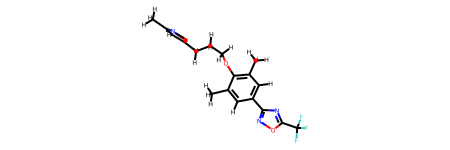

In [8]:
# Visualize the ligand
pharmacophore_1.ligand

A 2D representation of the pharmacophore can also be obtained with the draw method. This is a repreentation of the ligand with the pharmacophoric points highlighted

In [9]:
if pharmacophore_1.ligand is not None:
    pharmacophore_1.draw("./1ncr.png")

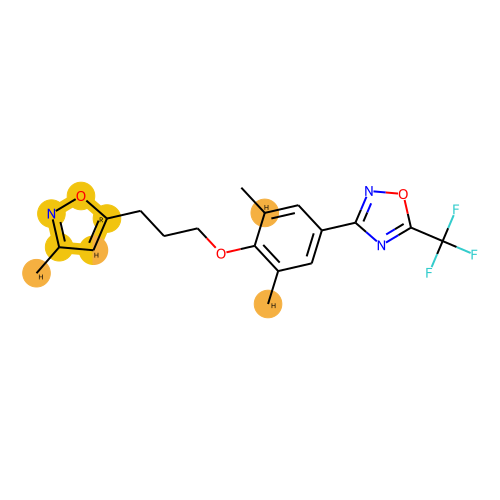

In [10]:
Image("./1ncr.png")

## Pharmacophore of ferrous Synechocystis hemoglobin
This protein has PDB id 2HZ1

In [11]:
file_name = os.path.join(pdbs_path, pdbs[1])
pharmacophore_2 = StructuredBasedPharmacophore().from_pdb(file_name, radius=1.0, hydrophobics="rdkit")

/home/daniel/Documents/libraries/OpenPharmacophore/openpharmacophore/structured_based.py:133: UserWarning: Ligand could not be transformed to rdkit molecule. Using default plip interactions
  warnings.warn("Ligand could not be transformed to rdkit molecule. Using default plip interactions")


By default the StructuredBasedarmacophore class will try to extract the ligand. However, this can fail sometimes, and in that case it will emmit a warning.

In [12]:
if pharmacophore_2.ligand is None:
    print("Ligand could not be extracted")

Ligand could not be extracted


In [13]:
pharmacophore_2.elements

[NegativeChargeSphere(center: (2.279, 2.6625, 3.2525); radius: 1.0),
 NegativeChargeSphere(center: (1.074, 4.8205, 7.3245); radius: 1.0),
 HbAcceptorSphereAndVector(center: (2.327, 3.574, 2.628); radius: 1.0; direction: (-0.8834, 0.2719, 0.3816)),
 HydrophobicitySphere(center: (5.134, 11.9745, 11.8155); radius: 1.0),
 HydrophobicitySphere(center: (0.396, 6.793, 7.373); radius: 1.0),
 HydrophobicitySphere(center: (11.724, 5.702, 7.226); radius: 1.0),
 HydrophobicitySphere(center: (12.502, 7.731, 9.51); radius: 1.0),
 HydrophobicitySphere(center: (7.62, 3.602, 4.389); radius: 1.0),
 HydrophobicitySphere(center: (8.728, 11.736, 11.502); radius: 1.0),
 HydrophobicitySphere(center: (1.567, 9.826, 8.907); radius: 1.0)]

In [14]:
pharmacophore_2.show()

NGLWidget()

## Pharmacophore of Abl kinase domain
This protein has PDB id 2HZI

When a protein has more than one ligand, and no ligand_id is passed the program will ask for the ligand we want to get the pharmacophore from.

In [15]:
file_name = os.path.join(pdbs_path, pdbs[2])
pharmacophore_3 = StructuredBasedPharmacophore().from_pdb(file_name, radius=1.0, hydrophobics="rdkit")

../../data/pdbs/2hzi.pdb PDB contains the following ligands:

JIN:A:600
JIN:B:600

Please enter for which one the pharmacophore should be computed 


 JIN:A:600


In [16]:
pharmacophore_3

StructuredBasedPharmacophore(n_elements: 5)

In [17]:
pharmacophore_3.show()

NGLWidget()

In [18]:
pharmacophore_3.elements

[HbAcceptorSphereAndVector(center: (16.163, 12.126, 2.521); radius: 1.0; direction: (-0.0991, 0.9107, 0.4011)),
 HbDonorSphereAndVector(center: (13.988, 12.055, 2.867); radius: 1.0; direction: (-0.1195, -0.9419, -0.3139)),
 HydrophobicitySphere(center: (10.418, 11.8007, 2.3763); radius: 1.0),
 HydrophobicitySphere(center: (21.7962, 17.734, 4.249); radius: 1.0),
 HydrophobicitySphere(center: (17.506, 13.853, 3.414); radius: 1.0)]

In [19]:
if pharmacophore_3.ligand is None:
    print("Failed to extract ligand")

Failed to extract ligand


## Pharmacophore of Estrogen Nuclear Receptor
This protein has PDB id 1QKU and it is complexed with estradiol.

In [20]:
file_name = os.path.join(pdbs_path, pdbs[3])
pharmacophore_4 = StructuredBasedPharmacophore().from_pdb(file_name,
                                                          ligand_id="EST:A:600",
                                                          radius=1.0, 
                                                          hydrophobics="rdkit")

In [21]:
pharmacophore_4.elements

[HbAcceptorSphereAndVector(center: (100.598, 17.99, 25.704); radius: 1.0; direction: (0.7872, -0.4533, 0.4182)),
 HbAcceptorSphereAndVector(center: (109.61, 12.027, 22.746); radius: 1.0; direction: (-0.5805, 0.431, 0.6908)),
 HbDonorSphereAndVector(center: (100.598, 17.99, 25.704); radius: 1.0; direction: (0.0046, 0.6614, 0.7501)),
 AromaticRingSphereAndVector(center: (102.8133, 16.7163, 24.5195); radius: 1.0; direction: (0.0937, 0.4983, -0.8619)),
 HydrophobicitySphere(center: (107.379, 12.449, 24.419); radius: 1.0),
 HydrophobicitySphere(center: (107.2112, 12.5732, 22.1112); radius: 1.0)]

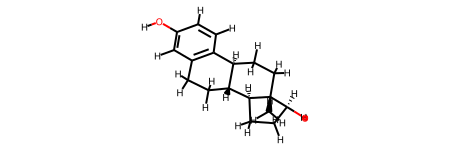

In [22]:
pharmacophore_4.ligand

In [23]:
pharmacophore_4.show()

NGLWidget()

In [24]:
if pharmacophore_4.ligand is not None:
    pharmacophore_4.draw("./1qku.png")

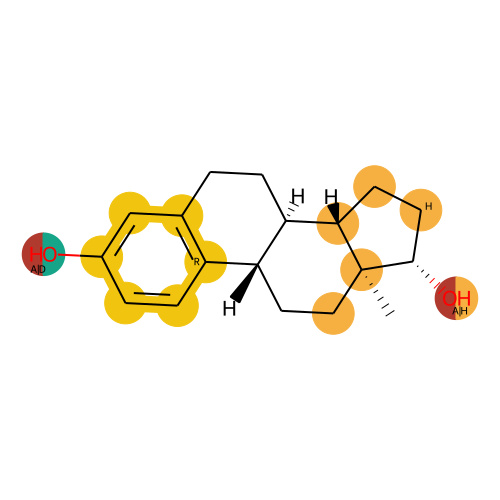

In [25]:
Image("./1qku.png")